# Magic Commands, Helper Functions and Decorators

In [1]:
import os
print(os.__file__)
#!pip install tensorboardx


C:\Users\35841\Anaconda3\envs\mllearn\lib\os.py


In [2]:
from __future__ import print_function
from IPython.display import Image
import torch
import numpy as np
# load the autoreload extension
%load_ext autoreload
# Set extension to reload modules every time before executing code
#%autoreload 2
#
## Easy to read version
#%system date
#
## Shorthand with "!!" instead of "%system" works equally well
#!!date
#!!ls
#
## Outputs a list of all interactive variables in your environment
#%who_ls
#
## Reduces the output to interactive variables of type "function"
#%who_ls function


What is and WHY Use PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  **An extensible alternative for NumPy harnessing the power of GPUs**
-  a **deep learning research platform that provides maximum flexibility
   and speed**

Getting Started
----------------------------

To get started, please open the [documentation get-started](https://pytorch.org/get-started/locally/)



## Comparison to Tensorflow 1. Pytorch advantages

Please read the following questions and try to guess the answers.
<ol>
  <li>What language has Torch been written in?</li>
  <li>Where does the name PyTorch come from?</li>
   <li> What  <a href="https://en.wikipedia.org/wiki/Programming_paradigm">programming paradigm </a>  is PyTorch built upon? Choose between declarative, procedural, imperative and functional. </li>
    <li> What is the main difference between Tensorflow1 and PyTorch in terms of runtime execution? </li>
    <li> Why graph dynamic execution in Pytorch better than static graph execution used e.g. in Tensorflow? </li>
</ol>




Now please watch the [video](https://www.youtube.com/watch?v=nbJ-2G2GXL0) and compare your prior guesses to the answers given in the video. Write down what you learned.

:)

## Why Learn Pytorch? 

Every new learning would be made so much easier by gathering motivation for it. This is based on the famous <a href="https://hoishampark.wordpress.com/2017/04/14/motivation-hacker-a-book-report/">MEVID </a>  formula
Now you might be wondering that PyTorch is a cool and versatile imperative programming based deep learning framework,in which the computations are handled dynamically. 

But..

**Why should I learn it ?**

**Simple answer : Best both for short and long research projects!**

But there is much more!

[This article will give you the motivation to learn PyTorch](https://www.analyticsindiamag.com/9-reasons-why-pytorch-will-become-your-favourite-deep-learning-tool/) 

# Setting Up CUDA and Pytorch

## Setting Up CUDA

It's a good practice to develop the habit of having the right tools for each job.
- If you have a separate NVIDIA GPU in your disposition, PyTorch should be used with CUDA to speed up computation. In this case, please [install CUDA](https://docs.nvidia.com/cuda/cuda-quick-start-guide/index.html)


- Otherwise you may use Google Colaboratory through which you can use Tesla K80 GPU for free! Please see [this post](https://medium.com/@ml_kid/google-colab-notebook-with-pytorch-v1-0-stable-lesson-9-46433881da05) on how to set up Google Colaboratory with Tesla. The first commands needed to run are specified in [this notebook](https://colab.research.google.com/drive/18R3Rz639Fa4ByFwzLrY5LmD8t3Ee5IUR) . You can always run any Jupyter Notebook on Google Colaboratory. To do this, just upload the notebook to Google Colaboratory while inside Colaboratory.
<div class="alert alert-warning" role="alert">
  Warning: You may run into authentication issues while trying to persist your variables on Colaboratory, especially after you wish to keep your session open to re-run it later. The free instance is periodically turned off and re-authentication may be required. Otherwise Colaboratory might complain about missing files (this may be because the session was disconnected at some point).
</div>


- Since the majority of this course is not GPU-intensive, you may also run the Notebooks on your CPU. 


In [31]:
# let us run this cell only if CUDA is available
# Print out your first tensor. Update the code with one line to print out your first tensor object
cuda0 = None
if torch.cuda.is_available():
    print("Your Pytorch runtime uses GPU")
    cuda0 = torch.device('cuda:0')
    first_tensor_on_cuda = torch.ones([2, 4], dtype=torch.int32, device=cuda0)
    print(first_tensor_on_cuda)
else :
    print("Your Pytorch runtime uses CPU")
    first_tensor_on_cpu = torch.ones([2, 4], dtype=torch.int32)



Your Pytorch runtime uses CPU



IF you wish to practice using CUDA, please install   <a href=" https://wiki.tiker.net/PyCuda/Installation"> PyCuda.</a>

Why you should use  <a href="https://devtalk.nvidia.com/default/topic/573367/pucuda-pros-and-cons/">PyCuda instead of C</a> 


In [32]:

import pycuda.driver as cuda
cuda.init()
## Get Id of default device
torch.cuda.current_device()

cuda.Device(0).name()

ModuleNotFoundError: No module named 'pycuda'


## Setting Up Tensorboard -- Visualization Platform (Works on Tensorflow, Pytorch, Keras,...)
It's always good to see the visual outputs of the code you are writing, and  especially in machine learning.Typically machine learning engineer would plot the underlying neural network as a graph, training error of the network during training time, visual outputs of the hidden layers.
That is why we give two examples of platforms that have native integration with PyTorch.

Popular Visualization platforms for Pytorch are [Visdom](https://github.com/facebookresearch/visdom) and [TensorboardX](https://github.com/lanpa/tensorboardX). According to the discussion on [reddit](https://www.reddit.com/r/MachineLearning/comments/8ej2j4/d_facebook_visdom_vs_google_tensorboard/) ,people use both, both for different purposes.

[How to use TensorboardX](http://www.erogol.com/use-tensorboard-pytorch/)

<div class="alert alert-success" role="alert">
  Followingly, the commands ran assume that you have a  Conda Virtualenv called dl created , and we are going to install the packages there.

</div>


In [ ]:
#!yes | conda install -n dl -c conda-forge tensorboardx
# start Tensorboard instance
#! yes |conda install -n dl -c conda-forge tensorflow 
#! yes |conda install -n dl -c conda-forge tensorboard 
log_path = './runs/gd/'
!tensorboard --logdir log_path
# to add more objects to Tensorboard, please read the manual

# Basic Data Structures in PyTorch. Tensors.

## Tensor Definition and Some Important Properties
### Definition of a n-th Order Tensor

**Practical Definition of a Tensor** :
An **n-th Order Tensor** is a n-dimensional array of numbers.
In this definition, each dimension is considered to be  independent of each other.

By *practical* we mean that this is the definition that is used in computer programming and software libraries that are used in the industry and practice.

The word *tensor* comes from physics and was initially used to describe the **tension** on materials. Since it was necessary to  describe the tension on each face of a solid body, a simple 2D matrix was enough, since the first dimension could be used to denote the normal direction of the face and the 2nd dimension the direction of the tension. 


<div class="alert alert-info"><h4>Comparison to mathematical definition of tensor</h4><p>
This definition differs significantly from the mathematically rigorous definition of a tensor, in which case a n=(p+q)-order or (p,q)-tensor is defined as multilinear mapping that is linear with respect to each of its arguments (p vectors and q  co-vectors or differential forms) that retains certain invariants under a coordinate transformation. Thus, in mathematics, only those multilinear mappings are tensors that retain its invariants.
    </p></div>

**Henceforth we are only going to use the practical definition of a tensor.**





## Tensor Interpretation in Programming Context
<div class="alert alert-success" role="alert">
Tensors are similar to Python's NumPy’s ndarrays but they have the additional property that
Tensor data structure can be scaled up horizontally and thus can also be used on a GPU to accelerate computing. 
</div>

[Tensor](https://en.wikipedia.org/wiki/Tensor) is also the **basic data structural unit in PyTorch**.


A 2D-matrix is an example of a 2-nd order tensor, but a specific example of a n-th order **tensor**, which in general has  **n** independent components. Consider the following example:


In [ ]:
#Image("assets/img/tensor.jpg")
# Source : https://www.google.com/url?sa=i&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwirxuj998nhAhUqtYsKHfFbAhUQjRx6BAgBEAU&url=https%3A%2F%2Fwww.slideshare.net%2FBertonEarnshaw%2Fa-brief-survey-of-tensors&psig=AOvVaw0tULmnEC2-vr346HuYGbdQ&ust=1555137171132510

We see that to represent a single pixel on an image, we need 3 independent components:

    > 1-st component denotes the x-location (width-location)
    > 2-nd component denotes the y-location (height-location)
    > 3-rd component denotes the color channel (R,G,B) since any colour displayed on a computer screen is formed from the 3x 8-bit (R,G,B)-triplet each having values between 0 and 255.
    
Thus we can think of a cat image on a computer screen  of as a discrete rectangular prism or a multidimensional array of numbers as shown on the above image. This rectangular n-dimensional array of numbers is called an **n-th order tensor**.

This conceptually natural connection between image and a tensor is very important since this forms the basis why GPUs are used in machine learning.
GPU is a graphical processing unit, usually containing many computational cores (many more than CPU, central processing unit) and they are optimized for operations that are done with images, which we now know to be n-dimensional tensors. 

*Thus it is believable why GPUs should be suitable for doing computations with tensors or high-dimensional data.*


### Tensors and Operations with Tensors in Pytorch

Followingly, let's see how to form tensors in PyTorch.
Tensors can be created from both Python base class data (e.g. list of lists) as well as from Numpy array data.
To get started, please check the [documentation](https://pytorch.org/docs/stable/tensors.html)


In [3]:
tensor_from_2d_list = torch.tensor([[1., -1.], [1., -1.]])


# Print the tensor object created from Python List 

# Write your code here ...
print(tensor_from_2d_list)

tensor_from_np_array = torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))


# Print the tensor object created from Python Numpy array 
# Write your code here ...
print(tensor_from_np_array)

tensor([[ 1., -1.],
        [ 1., -1.]])
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


Following are some common ways to create a [Tensor](#Definition-of-a-n-th-Order-Tensor):

In [14]:
a = torch.empty(2,2)
#print(a)
b = torch.zeros(2,2, dtype=torch.long)
#print(b)
c = torch.rand(5, 5)
f=torch.ones(10,10,dtype=torch.double)
#print(f)
d = a.new_ones(10,10,dtype=torch.double)
print(d)
e = torch.randn_like(d, dtype=torch.float) 
print(e)
print(np.empty(shape=[5, 2]))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=torch.float64)
tensor([[-7.0476e-01, -8.8150e-01, -1.2141e+00, -1.1942e+00,  1.3929e+00,
         -9.4873e-02,  1.6417e-01, -2.9905e-01, -1.0918e+00, -1.7683e+00],
        [-2.4625e-01,  1.2914e+00, -1.1461e+00,  5.6496e-01,  3.1937e-01,
         -9.6666e-01, -9.3130e-01, -1.7917e+00, -1.0940e+00,  1.7262e-02],
        [ 1.4332e-01,  5.2496e-01, -6.6334e-01, -9.9573e-01, -8.3959e-02,
         -6.4080e-01, -1.8285e-01,  1.5369e+00,  1.1088e+00, -9.0605e-02],
        [-7.8174e-01,  1.1183e-

Questions:
1. What is the difference between tensors a and b?
   
   Tensor a is the empty matrix that takes random values and is marginally faster than assigning other tensor like zeros,ones etc. [more...](https://www.quora.com/Python-programming-language-When-is-numpy-empty-useful)



2. What about d and e? When would you use randn_like function?
   Tensor d consists all elements 1 while e creates the tensor elements to be normally distributed. We se randn_like function to create the tensor that has elements distributed normally.
    

In [ ]:
Image("assets/img/tabcomplete.png")



###  Tensor to Numpy array conversion



In [15]:
test_array = np.arange(16)
test_tensor = torch.from_numpy(test_array)
test_array2 = test_tensor.numpy()
print(f"The type of test_array is, {type(test_array)}\n")
print(f"The type of test_tensor is, {type(test_tensor)}\n")
print(f"Are the shapes of the objects are equal? : {test_array.shape == test_tensor.shape}\n")
print(f"After converting the tensor back to Numpy array, is the initial array equivalent to the converted array?")
print(f"{all(test_array == test_array2)}")

The type of test_array is, <class 'numpy.ndarray'>

The type of test_tensor is, <class 'torch.Tensor'>

Are the shapes of the objects are equal? : True

After converting the tensor back to Numpy array, is the initial array equivalent to the converted array?
True


### Tensor Reshaping : View

In [21]:
x = torch.randn(4, 4)
print(x)
y = x.view(16)
z = x.view(-1, 8) 
print(x.size(), y.size(), z.size())

tensor([[-1.7432, -0.1138,  0.8926, -2.3064],
        [ 0.2178, -0.4100,  0.5412,  0.7007],
        [-0.1722,  0.9422,  0.7349, -1.4867],
        [-0.8015, -0.3011, -0.3467,  1.2257]])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [28]:
ar=np.random.randn(2,2)
print(ar)
print(ar.reshape(-1,4))

[[-0.23325417  0.42212734]
 [-1.53544647  0.09739498]]
[[-0.23325417  0.42212734 -1.53544647  0.09739498]]


View is a similar function to Numpy's reshape. What is the meaning of parameter -1?

<div class="alert alert-info"><h4>Note</h4><p>-1 means that if we don't know what is the dimensionality count in a particular dimension, leave it unspecified by writing  -1. In this case, the number of samples in this dimension is inferred from the other dimensions, e.g. if you have a 4 x 4 array x and you use x.view(-1,8), then -1 stands for 2.</p></div>



## Tensors on CUDA

The natural representation of many types of data is a in a form of a high-dimensional array. 
GPU’s have always been good for machine learning. GPU cores were originally designed for physics and graphics computation, which involves matrix operations. General computing tasks do not require lots of matrix operations, so CPU’s are much slower at these. Physics and graphics are also far easier to parallelise than general computing tasks, leading to the high core count.

Due to the matrix heavy nature of machine learning (neural nets), GPU’s were a great fit.
Next we are going to define the CUDA device, if available:

In [29]:
# create_formatted_var("device")
# We will use  
if cuda0 is not None:
    device = cuda0
    print("Cuda device cuda0 loaded before")
elif torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
else :
    print("Your system doesn't have CUDA")

NameError: name 'cuda0' is not defined

To save a data structure object directly to GPU, please use the ``device`` argument.
If the data object was created before in a memory location other than GPU-memory, use the ``tensorobject.to(device)`` syntax to transfer the data structure from memory to GPU memory.

In [ ]:
if cuda0 is not None:
    x = torch.ones(3,device="cuda")
else :
    cuda0 = 'cpu'
    x = torch.ones(3,device=cuda0)
x.device.type

# Basic Transformations in Pytorch

## Addition of Tensors

Before learning any transformations, it would be useful to know how quickly a  given transformation is going to run. For that purpose, please feel free to make use of the iPython Magic Command %%timeit , that creates a loop and evaluations its running time in Jupyter Notebook.

Take 5 minutes to go over the next TOP 5 Magic commands in Jupyter, it might you save a lot of time later

[TOP 5 Jupyter Magic commands](https://towardsdatascience.com/the-top-5-magic-commands-for-jupyter-notebooks-2bf0c5ae4bb8)

In [38]:
%%time
x = torch.tensor([1,2,3])
y = torch.tensor([0,0,1])

# way 1 :
result = torch.add(x,y)
print(result)



tensor([1, 2, 4])
Wall time: 6.28 ms


Addition: providing an output tensor as argument



In [39]:
# adds x to y
y.add_(x)
print(y)

tensor([1, 2, 4])


<div class="alert alert-info"><h4>Note</h4><p>Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.</p></div>

You can use standard NumPy-like indexing with all bells and whistles!



### Homework Exercise on Tensor Adding Error Handling:

Write a function ``try_adding_different_locations`` that has 4 input arguments:
- x : This is the input tensor, it should be passed as a default argument, that is 2nd-order 3x3 tensor of ones, created on CPU
- device: This should be passed as a default argument, and it is the CUDA device available on your system
- notbtoh : bool. This argument should be passed as boolean with True as default value
- output_type : string with default_value "cpu"

TASK: **The function should probe out all combinations in which the tensor addition should or should not work.**

## Matrix Multiplication on Tensor Objects using mm

From linear algebra course at school, you may remember the concept of matrix multiplication.
Since  image is a tensor, and tensor is a generalization of a matrix, matrix multiplication also works for tensors.

In a course taught in universities, called **Tensor Calculus**, the defined operations between tensors include tensor addition, tensor product and contraction, for example.

**Tensor product is not implemented in PyTorch**.
Practical applications reduce to to squeezing dimensions over 2, resulting in a 2-D tensor (or matrix), when multiplication is needed, thus the PyTorch multiplication is actually a matrix multiplication.

To do tensors multiplication, use ``torch.mm`` or ``torch.matmul`` .
<div class="alert alert-warning" role="alert">
Don't confuse ``dot`` and ``mm`` operators, check <a href="https://stackoverflow.com/questions/44524901/how-to-do-product-of-matrices-in-pytorch" class="alert-link">this link.</a>
 
To get element-wise product, use A*B.
</div>


In [ ]:
a = torch.from_numpy(np.array([[1,2,3],[4,5,6]]))
b = a
print(a.shape)
print(b.shape)
c = torch.mm(a,b)# doens't work, do you know why?


**Can the tensors a and  b be matrix-multiplied? Why / Why not?**

To matrix-multiply objects, the last dimension of the first object needs to coincide with the first dimension of the 2nd object.
If we have two objects with identical dimensionalities, one way to make the multiplication compatible is  to transpose either of those objects. Let's try it.

In [ ]:
c = torch.mm(a,b.t())
d = torch.mm(a.t(),b)
print(c)
print(d)

## In-Place Operations

Guess what is the following code going to print:

In [34]:
a = torch.tensor(np.array([[1,2,3],[4,5,6]]))
b = a
try:
    torch.mm(a,b.t())
    torch.add(a,b)
    print("First multiplication and addition succeeded")
except :
    print("First  multiplication failed")

try :
    print(f"The result of in-place addition is {a.add_(b)}")
    print("Second addition succeeded")
    (a.t()).mm_(b)
    print("Second multiplication succeeded")
except:
    print("Second  multiplication failed")


First multiplication and addition succeeded
The result of in-place addition is tensor([[ 2,  4,  6],
        [ 8, 10, 12]], dtype=torch.int32)
Second addition succeeded
Second  multiplication failed


Was your guess correct?

The crux lies in the _ meaning: We can often find underscored_versions of methods in PyTorch, which stand for in-place operations. That means that the object on which the operation is called, is changed in the computer memory, without explicitly saving the result.

Thus, often a binary operations $$(x , y)  \rightarrow z$$ that operates on two arguments can be made to be unary,
resulting in

$$x.method(y) \rightarrow z$$,

operating only on one argument, while the object the method is operating on (in this case ``x``), is meant to be overwritten in the computer memory, since the operation is done in-place.


<div class="alert alert-warning" role="alert">
    Notice however that multiplication as defined by ``mm`` or ``matmul`` or ``@`` does not have an in-place version, this it is always binary.
</div>


## Neural Network Definition
[Neural Networklink on Wikipedia](https://en.wikipedia.org/wiki/Neural_network)

A neural network is a network or circuit of neurons, or in a modern sense, an artificial neural network, composed of artificial neurons or nodes.  
The connections of the biological neuron are modeled as weights denoted by $w$ in the following graph. A positive weight reflects an excitatory connection, while negative values mean inhibitory connections. All inputs are modified by a weight and summed . Finally, an activation function (in the following graph, denoted by $f$) controls the amplitude of the output. For example, an acceptable range of output is usually between 0 and 1, or it could be −1 and 1. It is said that each neuron in the following layer gets the linear combination of activations (referring to the use of $f$ in the image below) of neurons from the previous layer. 

In [35]:
from IPython.display import Image
Image("assets/img/neural_network.png")

FileNotFoundError: No such file or directory: 'assets/img/neural_network.png'

FileNotFoundError: No such file or directory: 'assets/img/neural_network.png'

<IPython.core.display.Image object>

## Autograd : Automatic Differentiation

<div class="alert alert-success" role="alert">
  For the definition of neural network, please refer to the following link:
</div>



[NEURAL NETWORK DEFINITION](hb#Neural-Network-Definition)

**Autograd**, as one of the modern automatic differentiation frameworks, lies in the **core of Pytorch**.

Thus, it would be a very good idea to [Read more about Autograd](https://pytorch.org/docs/master/notes/autograd.html)

Autograd package in PyTorch automates the computation of backward passes in computational graphs.

In Autograd: 
- the forward pass of the neural network will define a computational graph
- nodes in the graph will be Tensors
- edges are functions producing output Tensors from input Tensors
- the backward pass of the neural network is for easy computation of gradients for those tensors  ``x``, for which  ``x.requires_grad``= ``True``, with respect to some scalar.

**Thus, to compute gradients of some variables, use functions that allow to pass  ``x.requires_grad``= ``True``.**

In [45]:
x = torch.tensor([2],requires_grad=True,dtype=torch.float)
print(x)
y = torch.tensor([3],requires_grad=True,dtype=torch.float)
z = x + y 
print(z)
z.backward()
print(z)
#print(f"Gradient with respect to z is {z.grad}")
#print(f"Gradient with respect to x is {x.grad}")
#print(f"Gradient with respect to y is {y.grad}")

tensor([2.], requires_grad=True)
tensor([5.], grad_fn=<AddBackward0>)
tensor([5.], grad_fn=<AddBackward0>)
Gradient with respect to z is None
Gradient with respect to x is tensor([1.])
Gradient with respect to y is tensor([1.])


Here we saw the most basic way to get a derivative or gradient.
We cannot compute the gradient of z, because it has not been initialized with the argument requires_grad=True.
We can though compute the gradient of x, and since derivative from x w.r.t. x is 1, the result is tensor([1.]), since the chosen data type was floating point number.

<div class="alert alert-warning" role="alert">
 Note: Often in neural networks, x and y are symbols used for input or output data and usually we are never required to compute gradients w.r.t. to the data.
    
The reason is simple:
When we have a model, e.g. like a neural network that is a black  box model, the model itself shouldn't have any assumptions or explicit dependencies on the data. It's up to the machine learning engineer to define the model or network structure in a way that the model learns from the data, but the underlying machinery should not hold explicit dependency on the data.
</div>

*Let's take a look at another example*

In [ ]:
x = torch.tensor([1, 2], requires_grad=True, dtype=torch.float)
y = torch.tensor([1, 3], requires_grad=True, dtype=torch.float)
print(f"At the beginning, x is {x}")
print(f"At the beginning, y is {y}")

x = x ** 2
y = y ** 2

print(f"After squaring, x is {x}")
print(f"After squaring, y is {y}")

x.add_(y)

print(f"After adding y to x in-place, the value of x is {x}")

z = x.sum()
print(f"The sum of the elements in this array is {z}")
z.backward()
print("Finally, after running the backward step to compute the gradients, we get:")
print(z)
# Note that z has no gradient requirement by default, thus z.grad prints None.
print(f"The gradient of z is {z.grad}")

### Verifying the correctness of Autograd Output

In [ ]:
from __future__ import print_function
from torch.autograd import Variable
import torch
import numpy as np
# important : every time before generating random numbers, you should set the seed!
torch.manual_seed(0)
np.random.seed(0)

x = Variable(torch.randn(1,1), requires_grad = True)
print(f"The value sampled from normal distribution gives {x} \n")
y = 3*x
print(f"When we form a linear function of {x} by multiplying this sample value by 3, we get {y}\n")
z = y**2 # derivative w.r.t. x is:
print(f"After that we form a quadratic function of y, and at this sample value, it takes a value of {z} \n")
print("Now we are going to register the hooks for each variable \n")
x.register_hook(print)
y.register_hook(print)

#z.register_hook(print)
z.backward(retain_graph=True) # prints all the gradients needed
z2.backward(retain_graph=True) # prints all the gradients needed

print(f"Gradients obtained from the first graph are {z.grad} \n")
#print(f"Gradients obtained from the second graph are {z2.grad} \n")





You might have seen that z.grad doesn't print anything, but to see the gradient components, you have to register the hook for that particular variable.

**The same example with the gradient conflict:**

In [ ]:
torch.manual_seed(0)
x = Variable(torch.randn(1,1), requires_grad = False)
y2 = Variable(3*x,requires_grad=False)
y2.register_hook(print)
z2 = Variable((y2)**2,requires_grad=True)
z2.register_hook(print)
z2.backward()
print(f"The value of y is {y}")
print(z2.grad)

In [ ]:
print(f"The z value is {9*1.54**2}")
print(f"The grad_y(z) is {6*1.54}")
print(f"The grad_x(z) is {18*1.54}")

### Recap : How to properly pass tensors and find their gradients

In [ ]:
from __future__ import print_function
from torch.autograd import Variable
import torch
torch.manual_seed(0)
xx = Variable(torch.randn(1,1), requires_grad = True)
yy = 3*xx
zz = yy**2

yy.register_hook(print)
zz.backward()

To be sure that the differentiation is working correctly, let us compute the following:
$$A(x)  = \partial_x z(y(x)) = \partial_x (y^2(x)) = \partial_x (9x^2) = 18x$$.
If $x = -1.5298$, then $$A(x) = 18 \cdot x = -27.5364 \approx -27.5356$$ 

and we see how Pytorch could be used as a symbolic mathematics framework to compute e.g. derivatives, since the chain rule is implemented there internally. With computationally intensive tasks, the effective implementation of automatic differentiation could be a huge benefit!

In [ ]:
18*(-1.5298) 

One could observe that PyTorch's grad isn't really a gradient, because the normally known gradient as  in fact a directional derivative. If we wish to take the derivative from x w.r.t. x, we get:

In [ ]:
x = torch.tensor([2,4,5],requires_grad=True,dtype=torch.float)
x.register_hook(print)
x.backward()
print(f"Gradient with respect to x is {x.grad}")

<div class="alert alert-warning" role="error">

RuntimeError: grad can be implicitly created only for scalar outputs
</div>

## Autograd Application : Gradient Descent in PyTorch

Next we are going to take a look at a basic example, adopted from [Github demo for Autograd](https://github.com/jcjohnson/pytorch-examples#pytorch-autograd)

PLEASE MAKE SURE THAT log_path variable is initialized properly
[in setup](#Setting-Up-Visualization-Platform-on-Pytorch)

In [ ]:
cmd = "pip install --upgrade tensorboardX --user "
pw = "data"
!echo {pw}|  {cmd}

In [21]:
from tensorboardX import SummaryWriter
log_path = './runs/gd/'

if log_path:
    print("accessing predefined path")
    writer = SummaryWriter(log_dir=log_path)
else :
    print("using new path set")
    writer = SummaryWriter(log_dir='./runs/gd/')
#In addition to SummaryWriter, there are also other writers, please check the manual
# https://tensorboardx.readthedocs.io/en/latest/tutorial.html

# !tensorboard --logdir log_path --host localhost --port 8088
# you have to execute tensorboard command from another shell, otherwise you cannot proceed with running the notebook
# read this : https://medium.com/@anthony_sarkis/tensorboard-quick-start-in-5-minutes-e3ec69f673af


accessing predefined path
TensorBoard 1.13.1 at http://localhost:8088 (Press CTRL+C to quit)
I0724 14:00:58.510361 140414225225472 _internal.py:122] 127.0.0.1 - - [24/Jul/2019 14:00:58] "GET / HTTP/1.1" 200 -
I0724 14:00:59.602966 140414225225472 _internal.py:122] 127.0.0.1 - - [24/Jul/2019 14:00:59] "GET /font-roboto/oMMgfZMQthOryQo9n22dcuvvDin1pK8aKteLpeZ5c0A.woff2 HTTP/1.1" 200 -
I0724 14:01:00.499862 140414225225472 _internal.py:122] 127.0.0.1 - - [24/Jul/2019 14:01:00] "GET /tf-interactive-inference-dashboard/editedexample.png HTTP/1.1" 200 -
I0724 14:01:00.510979 140414233618176 _internal.py:122] 127.0.0.1 - - [24/Jul/2019 14:01:00] "GET /tf-interactive-inference-dashboard/distance.png HTTP/1.1" 200 -
I0724 14:01:00.521423 140413543003904 _internal.py:122] 127.0.0.1 - - [24/Jul/2019 14:01:00] "GET /tf-interactive-inference-dashboard/explorecounterfactuals.png HTTP/1.1" 200 -
I0724 14:01:00.522659 140413534611200 _internal.py:122] 127.0.0.1 - - [24/Jul/2019 14:01:00] "GET /tf-inte

I0724 14:02:05.381151 140413534611200 _internal.py:122] 127.0.0.1 - - [24/Jul/2019 14:02:05] "GET /data/runs HTTP/1.1" 200 -
I0724 14:02:05.381647 140413543003904 _internal.py:122] 127.0.0.1 - - [24/Jul/2019 14:02:05] "GET /data/experiments HTTP/1.1" 200 -
I0724 14:02:05.382656 140414233618176 _internal.py:122] 127.0.0.1 - - [24/Jul/2019 14:02:05] "GET /data/environment HTTP/1.1" 200 -
^C


In [24]:
writer

In [25]:
# Code in file autograd/two_layer_net_autograd.py
import torch

#device = torch.device('cuda') # Uncomment this to run on GPU
device = torch.device('cpu') # Uncomment this to run on CPU

# N is batch size;
# D_in is input dimension;
# H is hidden dimension; 
#D_out is output dimension.
N, D_in, H, D_out = 64, 350, 50, 20

# input data : batch of 64 times 1000 features
# output data : 100 x 10 continues values (real scalars)

# Create random Tensors to hold input and outputs
x = # generate normally distributed data of dim NxD_in, store it on device, requires_grad = False
y = # generate normally distributed data of dim NxD_out, store it on device, requires_grad = False

# Create random Tensors for weights; setting requires_grad=True means that we
# want to compute gradients for these Tensors during the backward pass.
# here the gradient will be computed for the variables that are related to the model learning something new,
# i.e. the network weights in this case


# WEIGHTS
w1 = #generate normally distributed data of dim D_in x H, store it on device, requires_grad = True 
w2 = #generate normally distributed data of dim H x D_out, store it on device, requires_grad = True 

# initialize loss value to a high number 

# initialize arrays errors, w1_array and w2_array to empty lists
errors = # write here
w1_array =  # write here
w2_array =  # write here
 # set the network learning rate parameter 'learning_rate' to some small number


In [29]:
for iteration in range(10000):
    # Forward pass: compute predicted y using operations on Tensors. Since w1 and
    # w2 have requires_grad=True, operations involving these Tensors will cause
    # PyTorch to build a computational graph, allowing automatic computation of
    # gradients. Since we are no longer implementing the backward pass by hand we
    # don't need to keep references to intermediate values.
    # predict the values by multiplying x with weight matrix w1, then apply RELU activation and multiply the result by weight matrix w2
    y_pred = # your code here ; the final prediction is given by matrix multiplying the data 
    #with the two set of weights, making the intermediate values non-negative (RELU activation function)

    # calculate the mean squared error (MSE)
    error =  # your code here

    
    writer.add_scalar(tag="Last run",scalar_value= error, global_step = iteration)
    writer.add_histogram("error distribution",error)
    
    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
   
    #error.WHAT_FUNCTION_here ?

    # Update weights using gradient descent. For this step we just want to mutate
    # the values of w1 and w2 in-place; we don't want to build up a computational
    # graph for the update steps, so we use the torch.no_grad() context manager
    # to prevent PyTorch from building a computational graph for the updates
    
    
    with torch.no_grad():
        # use w1.grad to update w2 according to the gradient descent formula
        # use w2.grad to update w2 according to the gradient descent formula
        # also use the learning_rate you set before!
        w1 -= # your code here
        w2 -= # your code here
        
    if iteration % 50 == 0:
        print("Iteration: %d - Error: %.4f" % (iteration, error))
        w1_array.append(w1.cpu().detach().numpy())
        w2_array.append(w2.cpu().detach().numpy())
        errors.append(error.cpu().detach().numpy())
    # Manually zero the gradients after running the backward pass
    w1.grad.zero_()
    w2.grad.zero_()
    if loss_value < 1e-6:
        print("Stopping gradient descent, algorithm converged, MSE loss is smaller than 1E-6")
        break
        
writer.close()

Iteration: 0 - Error: 102.8600
Iteration: 50 - Error: 102.7833
Iteration: 100 - Error: 102.7065
Iteration: 150 - Error: 102.6298
Iteration: 200 - Error: 102.5532
Iteration: 250 - Error: 102.4768
Iteration: 300 - Error: 102.4003
Iteration: 350 - Error: 102.3240
Iteration: 400 - Error: 102.2478
Iteration: 450 - Error: 102.1717
Iteration: 500 - Error: 102.0955
Iteration: 550 - Error: 102.0196
Iteration: 600 - Error: 101.9437
Iteration: 650 - Error: 101.8678
Iteration: 700 - Error: 101.7921
Iteration: 750 - Error: 101.7164
Iteration: 800 - Error: 101.6407
Iteration: 850 - Error: 101.5653
Iteration: 900 - Error: 101.4898
Iteration: 950 - Error: 101.4145
Iteration: 1000 - Error: 101.3392
Iteration: 1050 - Error: 101.2640
Iteration: 1100 - Error: 101.1889
Iteration: 1150 - Error: 101.1139
Iteration: 1200 - Error: 101.0389
Iteration: 1250 - Error: 100.9642
Iteration: 1300 - Error: 100.8893
Iteration: 1350 - Error: 100.8146
Iteration: 1400 - Error: 100.7401
Iteration: 1450 - Error: 100.6655
Ite

# Pytorch Homework Solutions

## Solution for Homework 1

In [ ]:
# https://docs.python.org/3/tutorial/errors.html#raising-exceptions to read more about Exception handling
def location_indicator(tensor_):
    indicatorstring = "CUDA" if tensor_.device.type == "cuda" else "CPU"
    print(f"The value of tensor_ is {tensor_} and the tensor location type is {indicatorstring}")
    return indicatorstring

def try_adding_block(x,y,only_convert_one=True):
    print(f"x is the following {x}")
    print(f"y is the following {y}")
    try:
        if x.device.type == y.device.type:    
            if only_convert_one == False:
                z = x.type(torch.DoubleTensor) + y.type(torch.DoubleTensor)
                print("Adding succeeded, objects are in the same memory type") 
            else :
                try :
                    z = x.type(torch.DoubleTensor) + y
                except TypeError:
                    print("Unhandled error thrown because the tensors are of different type!")
                    raise TypeError("Unhandled error thrown because the tensors are of different type!")

                
        else :
             raise TypeError("Adding on different memory banks is not allowed, will result in TypeError!")
            
    except TypeError:
        print("The additives are of different type, addition not implemented for different types of tensors!")
    
    else :
        print("No exception thrown!")
    finally:
        print("End of the function")
                
def try_adding_different_locations(x = torch.ones(3,device="cpu"),\
                                   device = torch.device("cuda"),notboth=True,output_type = "cpu"):
    """
    First a tensor x is created for CPU and the default device is set to be CUDA.
    Then
    """
    if device :
        indicatorstring = location_indicator(tensor_=x)
        if indicatorstring == "CPU":
              x = x.to("cuda", torch.double)     # ``.to`` can also change dtype together!
              print(f"Before the Device type was CPU, but now it is {x.device.type}")
        y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
        print("First we will enforce the data type of both tensors, adding is going to work!")
        try_adding_block(x,y,only_convert_one=False) # convert both to the same type, adding works
        print("\n")
        
        indicatorstring_cuda = location_indicator(tensor_=x)
        if indicatorstring_cuda == "CUDA":
            x = x.to("cpu", torch.double)     # ``.to`` can also change dtype together!
            print(f"Before the Device type was CUDA, but now it is {x.device.type}")
        
       
        indicatorstring_final = location_indicator(tensor_=x) # here the memory type is CPU for one
        
        print("\n")
        try_adding_block(x,y,only_convert_one = False) # adding doesn't work, different memory locations
        
        print("\n")
        print("Now we are enforcing the data type of only one tensor, adding is not going to work!")
        try_adding_block(x,y,only_convert_one = notboth) # converting only one , adding doesnt work
        
        print("\n\n")
        
        # After we convert the Memory type to CUDA for both, adding will work:
        x = x.to("cuda", torch.double)
        try_adding_block(x,y,only_convert_one = False)

    else :
        print("To run this section, please install CUDA as described in the Setting up Pytorch section")
   
    print("Program ended!")

try_adding_different_locations()

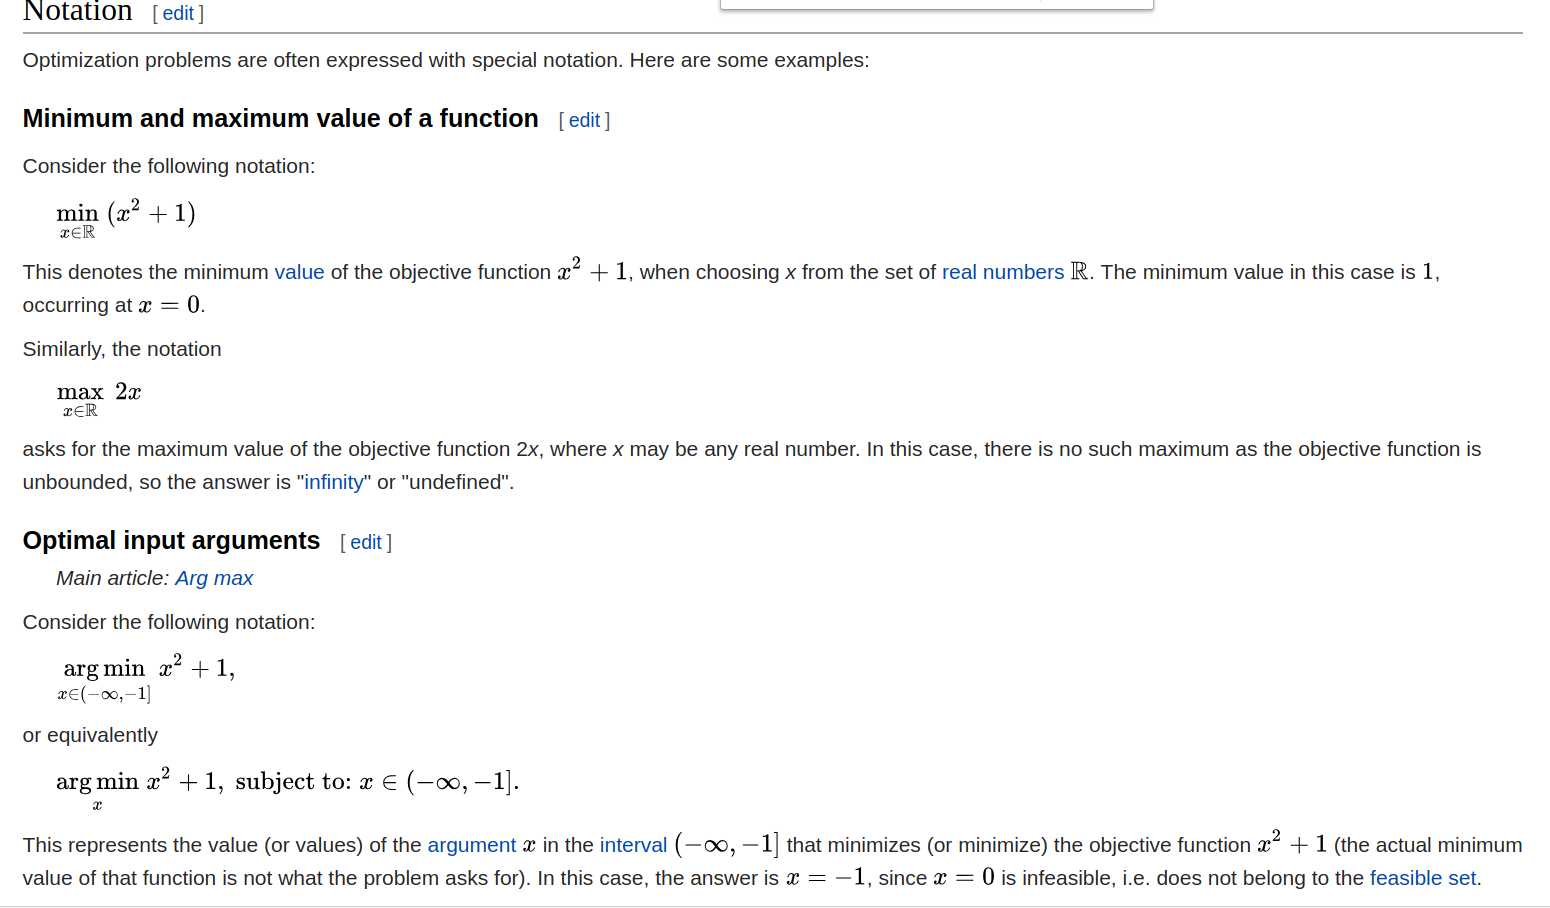

In [3]:
Image("assets/img/wikipedia_example_notation.png")

# THIS IS HOW YOU SET UP AN OPTIMIATION PROBLEM

# Gradient Descent in Python :
## Effect of Parameters in Gradient Descent

In [1]:
# Assume that we have been given a generic two variable polynomial function
def two_variable_function(x, y):
    z = x**3 + 2*(x*y) + 3*(y**2) 
    return z

Our goal is to find the global minimum of this function within a specified rectangle from -10 to 10

In [2]:
boundary_grid_values  = [two_variable_function(-10,-10),two_variable_function(-10,10),\
                         two_variable_function(10,-10),two_variable_function(10,10)]
local_extrema_values = [two_variable_function(0,0),two_variable_function(6/27,-2/27)]
min(boundary_grid_values)
#np.min(np.array([boundary_grid_values,two_variable_function(0,0),two_variable_function(6/27,-2/27)]))
if (min(boundary_grid_values) == min(min(local_extrema_values),min(boundary_grid_values))) == True:
    print(f"The minimum amongst the evaluated points is {min(boundary_grid_values)}")

The minimum amongst the evaluated points is -900


Analyzing this function, we get two stationary points
$(x,y) = (0,0)$ and $(x,y) = (6/27,-2/27)$, since the first derivatives give:

In [3]:
from sympy import symbols
x,y = symbols('x y')
# z = x^3 + 2xy + 3y^2
z = two_variable_function(x, y)
derivatives = z.diff(x,1),z.diff(y,1)
print(derivatives)
# derivatives
# dz/dx = 3*coefficients[0]*x**2 + coefficients[1]*y 
# dz/dy = coefficients[1]*x + 2*coefficients[2]*y
# https://docs.sympy.org/latest/tutorial/calculus.html use that to verify



(3*x**2 + 2*y, 2*x + 6*y)


-1033.3325


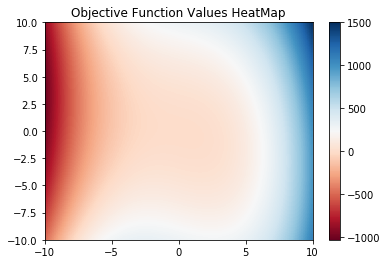

y minimum location is  3.3500000000001897
x minimum location is  -10.0


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

startgrid=-10
endgrid=10.05
a = np.arange(startgrid, endgrid, 0.05)
b = np.arange(startgrid, endgrid, 0.05)

x, y = np.meshgrid(a, b) # creating the evaluation domain grid.
# NB! If the global optimum of the function lies outside the grid, 
# this global optimum would never be discovered since the cost function would never be evaluated there.

z = two_variable_function(x, y)


fig, ax = plt.subplots()
z_min, z_max = z.min(),z.max()
print(z.min())

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('Objective Function Values HeatMap')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)
plt.show()

# unravel_index does the inverse. Given a linear index, it computes the corresponding ND index. 
# Since this depends on the block dimensions, these also have to be passed
(x_min_idx,y_min_idx) = np.unravel_index(np.argmin(z), z.shape)

print(f"y minimum location is  {a[x_min_idx]}")
print(f"x minimum location is  {b[y_min_idx]}")
#l2 = b[y_min_idx]
#ax.text(-5, -7.5, l1,fontsize=14)
plt.show()
#ax.legend(loc = 1)


Thus we see that the minimum value is -1033, and that this happens in a semiellipse close to the origin.

Let's see if we get close to -1000 also with gradient descent.

In [9]:
%%time 
#!yes | conda install -n dl -c conda-forge matplotlib   -- to install matplotlib into conda env dl
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from sympy import *
import random

# define a 2-variable function z = f(x,y)
def two_variable_function(x, y):
    z = x**3 + 2*x*y + 3*(y**2) 
    return z

def gradient_descent(x_start, y_start, learning_rate, epochs):
    """
    Each following step of the gradient descent depends on the result of the previous step.
    """
    # initialize the grid values as empty lists for the variables
    
    # first run
    x = y = z = []
    x_old = x_start
    y_old = y_start
    
    x.append(x_old)
    y.append(y_old)
    z_gd = two_variable_function(x_old, y_old)
    z.append(z_gd)
    
    # further runs

    # begin the loops to update x, y and z
    for i in range(epochs):
        x_gd = x_old - learning_rate*(3*x_old**2 + 2*y_old)
        y_gd = y_old - learning_rate*(2*x_old + 6*y_old)
        x.append(x_gd)
        y.append(y_gd)
        #print(x)
        #print(y)
        #print(two_variable_function(x, y))
        z_gd = two_variable_function(x_gd, y_gd)
        z.append(z_gd)  # appending the values for z
        # for the next iteration, the new values will be the old values
        x_old = x_gd
        y_old = y_gd

    return x_gd, y_gd, z_gd


####### GIVING THE INITIAL VALUES FOR THE GRADIENT DESCENT

xstart = -1
ystart = -0.5


whatindex = -1
def precpr(x,prec=3):
    return round(x,prec)

lr = np.linspace(0.001,1,7)
xs = np.linspace(-9.9,9.9,4)
ys = xs
idx = 0
best_triplet = ''
best_loss = 1e6
best_z = 1e6
best_x = 1e6
best_y = 1e6
z = two_variable_function(xs,ys)
print(f"Before starting gradient descent, objective function value was: {precpr(two_variable_function(x=xs[0],y=ys[0]))}")

for l in lr:
    for xstart in xs:
        for ystart in ys:
            epochs = random.randint(30,100)
            x_gd, y_gd, z_gd = gradient_descent(x_start=xstart, y_start=ystart, learning_rate=l, epochs = epochs)
            
            #print("\n")
            #print("Last value of x is")
            #print(x_gd[-1])
            if abs((z_gd)-(-1033.33))<best_loss:
                best_loss = abs(z_gd -(-1033.33))
                best_triplet = f"{xstart}_{ystart}_{l}"
                whatindex = idx
                best_x = x_gd
                best_y = y_gd
                best_z = z_gd
            print("\n")
            print(f"Iteration {idx},CONFIGURATION l:{l},xstart:{xstart},ystart:{ystart}")
            print("\n")
            print(f"After gradient descent of {epochs} epochs, the values are:")
            print(f"At the optimum, the objective function value is {precpr(best_z)}")
            print(f"At the optimum, the value of x is {precpr(best_x)} and the value of y is {precpr(best_y)}")
            idx += 1

print(f"The optimal loss was achieved in iteration {whatindex}")
print(f"The found loss coordinates (x,y) are ({precpr(best_x)},{precpr(best_y)})")


Before starting gradient descent, objective function value was: -480.249


Iteration 0,CONFIGURATION l:0.001,xstart:-9.9,ystart:-9.9


After gradient descent of 93 epochs, the values are:
At the optimum, the objective function value is 1000000.0
At the optimum, the value of x is 1000000.0 and the value of y is 1000000.0


Iteration 1,CONFIGURATION l:0.001,xstart:-9.9,ystart:-3.3


After gradient descent of 84 epochs, the values are:
At the optimum, the objective function value is 1000000.0
At the optimum, the value of x is 1000000.0 and the value of y is 1000000.0


Iteration 2,CONFIGURATION l:0.001,xstart:-9.9,ystart:3.3000000000000007


After gradient descent of 38 epochs, the values are:
At the optimum, the objective function value is 1000000.0
At the optimum, the value of x is 1000000.0 and the value of y is 1000000.0


Iteration 3,CONFIGURATION l:0.001,xstart:-9.9,ystart:9.9


After gradient descent of 38 epochs, the values are:
At the optimum, the objective function value is 1000

/home/data/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/data/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars
/home/data/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/data/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars




Iteration 92,CONFIGURATION l:0.8335,xstart:9.9,ystart:-9.9


After gradient descent of 72 epochs, the values are:
At the optimum, the objective function value is -578.894
At the optimum, the value of x is -8.225 and the value of y is 2.85


Iteration 93,CONFIGURATION l:0.8335,xstart:9.9,ystart:-3.3


After gradient descent of 64 epochs, the values are:
At the optimum, the objective function value is -578.894
At the optimum, the value of x is -8.225 and the value of y is 2.85


Iteration 94,CONFIGURATION l:0.8335,xstart:9.9,ystart:3.3000000000000007


After gradient descent of 64 epochs, the values are:
At the optimum, the objective function value is -578.894
At the optimum, the value of x is -8.225 and the value of y is 2.85


Iteration 95,CONFIGURATION l:0.8335,xstart:9.9,ystart:9.9


After gradient descent of 54 epochs, the values are:
At the optimum, the objective function value is -578.894
At the optimum, the value of x is -8.225 and the value of y is 2.85


Iteration 96,CONFIGUR

We note that sometimes gradient descent might converge to a solution outside the feasible region.
This is why in neural networks, it is important to understand whether the optimizing algorithm used considers the problem from unconstrained or constrained optimization context.

In [10]:
best_loss

454.43575569195616

## Gradient Descent : Full Example with Dynamic Visualization

In [11]:

def gradient_descent_demo(x_start, y_start, learning_rate, epochs):
    """
    Each following step of the gradient descent depends on the result of the previous step.
    """
    def two_variable_demo_function(x, y):
        #z = -x**4 + 2*(x*y) + 3*(y**2) 
        z = x**2 + 2*(x*y) + 3*(y**2) 

        return z
    # initialize the grid values as empty lists for the variables
    
    # first run
    x_gd=y_gd = z_gd = []
    x_old = x_start
    y_old = y_start
    
    x_gd.append(x_old)
    y_gd.append(y_old)
    z_gd.append(two_variable_demo_function(x_old, y_old))
    
    # further runs

    # begin the loops to update x, y and z
    for i in range(epochs):
        x = x_old - learning_rate*(2*x_old+2*y_old)
        y = y_old - learning_rate*(2*x_old+9*y_old)
        x_gd.append(x)
        y_gd.append(y)
        z_gd.append(two_variable_demo_function(x, y))  # appending the values for z
        # for the next iteration, the new values will be the old values
        x_old = x
        y_old = y

    return x_gd, y_gd, z_gd

x_gd, y_gd, z_gd = gradient_descent_demo(x_start=0.5, y_start=0.3, learning_rate=0.02, epochs = 20)



In [12]:
startgrid=-2
endgrid=2.05
a = np.arange(startgrid, endgrid, 0.05)
b = np.arange(startgrid, endgrid, 0.05)

x, y = np.meshgrid(a, b) # creating the evaluation domain grid.

def two_variable_demo_function(x, y):
    z = x**2 + 2*(x*y) + 3*(y**2) 
    return z
z = two_variable_demo_function(x, y)

# FIND THE ACTUAL MIN coordinates for x and y:
(x_min_idx,y_min_idx) = np.unravel_index(np.argmin(z), z.shape)
# Actual minimum coordinate values
print(x_min_idx)
print(a[x_min_idx])
print(b[y_min_idx])

40
1.7763568394002505e-15
1.7763568394002505e-15


Thus we see that the global minimum of that convex function in that region is located at $(x,y)=(0,0)$. 

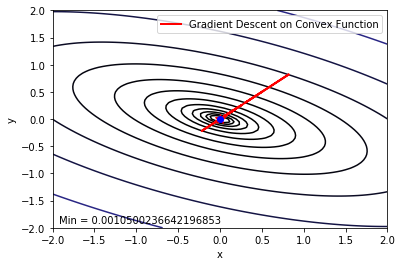

In [13]:
x_gd, y_gd, z_gd = gradient_descent_demo(x_start=0.5, y_start=0.3, learning_rate=0.14, epochs = 10)

############ INITIALIZING THE PLOTTING SYSTEM ###############
def init():
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')

    return line, point, value_display

def animate(i):
    # Animate line
    line.set_data(x_gd[:i], y_gd[:i])
    
    # Animate points
    point.set_data(x_gd[i], y_gd[i])

    # Animate value display
    value_display.set_text('Min = ' + str(z_gd[i]))

    return line, point, value_display

##############################################################



fig1, ax1 = plt.subplots()

ax1.contour(x, y, z, levels=np.logspace(startgrid, endgrid, 15), cmap='CMRmap')
# Plot target (the minimum of the function)

# PLOT THE ACTUAL MIN POINT 
min_point = np.array([0., 0.])
min_point_ = min_point[:, np.newaxis]

ax1.plot(*min_point_, two_variable_demo_function(*min_point_), 'r*', markersize=10)
ax1.set_xlabel(r'x')
ax1.set_ylabel(r'y')
''' Animation '''
# Create animation
line, = ax1.plot([], [], 'r', label = 'Gradient Descent on Convex Function', lw = 2.0)
point, = ax1.plot([], [], 'bo')
value_display = ax1.text(0.02, 0.02, '', transform=ax1.transAxes)

ax1.legend(loc = 1)

anim = animation.FuncAnimation(fig1, animate, init_func=init,
                               frames=len(x_gd), interval=120, 
                               repeat_delay=60, blit=True)

HTML(anim.to_jshtml())

So we have seen, why gradient descent is not the most optimal optimizer:
    - Finds local optima, not global. Always think whether the optimization problems is convex or concave.
    - Only gradient descent itself means **unconstrained** optimization. If there are constraints to the domain, then gradient descent doesn't follow  those!  If we have a continuous function on some domain, then the boundary values have to be checked because the cost function value at those might be more optial
    - The optimization may not converge, it may start oscillating or diverge
        - Choice of step size is crucial. Too big step size can result in exploding gradient, too small step size in vanishing gradient
    - Using only gradient information, we have only 1st order information about the function. There are 2nd order methods such as L-BFGS, Conjugate gradient and Newton method that have improved convergence properties, but at higher computational cost

## Binary Classification Lost Function


Choosing the right cost function for achieving the desired result is a critical point of machine learning problems. The basic approach, if you do not know exactly what you want out of your method, is to use [Mean Square Error (Wikipedia)](https://en.wikipedia.org/wiki/Mean_squared_error) for regression problems and Percentage of error for classification problems. However, if you want _good_ results out of your method, you need to _define good_, and thus define the adequate cost function. This comes from both domain knowledge (what is your data, what are you trying to achieve), and knowledge of the tools at your disposal. 

I do not believe I can guide you through the cost functions already implemented in TensorFlow, as I have very little knowledge of the tool, but I can give you an example on how to write and assess different cost functions.

---

To illustrate the various differences between cost functions, let us use the example of the binary classification problem, where we want, for each sample $x_n$, the class $f(x_n) \in \{0,1\}$.

Starting with **computational properties**; how two functions measuring the "same thing" could lead to different results. Take the following, simple cost function; the percentage of error. If you have $N$ samples, $f(y_n)$ is the predicted class and $y_n$ the true class, you want to minimize

* $\frac{1}{N} \sum_n \left\{
\begin{array}{ll}
1 & \text{ if } f(x_n) \not= y_n\\
0 & \text{ otherwise}\\
\end{array} \right. = \sum_n y_n[1-f(x_n)] + [1-y_n]f(x_n)$.

This cost function has the benefit of being easily interpretable. However, it is not smooth; if you have only two samples, the function "jumps" from 0, to 0.5, to 1. This will lead to inconsistencies if you try to use gradient descent on this function. One way to avoid it is to change the cost function to use probabilities of assignment; $p(y_n = 1 | x_n)$. The function becomes

* $\frac{1}{N} \sum_n y_n p(y_n = 0 | x_n) + (1 - y_n) p(y_n = 1 | x_n)$.

This function is smoother, and will work better with a gradient descent approach. You will get a 'finer' model. However, it has other problem; if you have a sample that is ambiguous, let say that you do not have enough information to say anything better than $p(y_n = 1 | x_n) = 0.5$. Then, using gradient descent on this cost function will lead to a model which increases this probability as much as possible, and thus, maybe, overfit.

Another problem of this function is that if $p(y_n = 1 | x_n) = 1$ while $y_n = 0$, you are certain to be right, but you are wrong. In order to avoid this issue, you can take the log of the probability, $\log p(y_n | x_n)$. As $\log(0) = \infty$ and $\log(1) = 0$, the following function does not have the problem described in the previous paragraph:

* $\frac{1}{N} \sum_n y_n \log p(y_n = 0 | x_n) + (1 - y_n) \log p(y_n = 1 | x_n)$.

This should illustrate that in order to optimize the _same thing_, the percentage of error, different definitions might yield different results if they are easier to make sense of, computationally.

**It is possible for cost functions $A$ and $B$ to measure the _same concept_, but $A$ might lead your method to better results than $B$.**

---
In conclusion, defining the cost function is defining the goal of your algorithm. The algorithm defines how to get there.
